# Problem Statement:

###  Predict appropriate insurance premiums based on customer risk factors.

In [40]:
import numpy as npb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Data Gathering

In [3]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


The `df.describe()` method in Pandas provides a quick way to generate descriptive statistics on numeric columns in a DataFrame. It outputs the following information for each numeric column:

- **Count**: The number of non-empty values.
- **Mean**: The average value.
- **Standard Deviation (std)**: A measure of data dispersion.
- **Minimum (min)**: The smallest value.
- **25th Percentile (25%)**: The value below which 25% of the data falls.
- **50th Percentile (50%) or Median**: The middle value.
- **75th Percentile (75%)**: The value below which 75% of the data falls.
- **Maximum (max)**: The largest value¹²³.



In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data Preprocessing

In [7]:
# Check duplicates
df.duplicated().sum()

1

In [9]:
# Remove duplicates 
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
# Check missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
df.columns = ['age', 'gender', 'bmi', 'child', 'smoker', 'region', 'charges']
df


,age,gender,bmi,child,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [15]:
df['charges'].min()

1121.8739

In [16]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [18]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [19]:
df['charges'].min()

1121.8739

In [20]:
df['charges'].describe()


count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [21]:
female = df[df['gender'] == 'female']
male = df[df['gender'] == 'male']

In [23]:
female.shape[0]

662

In [24]:
male.shape[0]

675

In [25]:
df['child'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [26]:
df['child'].value_counts()

child
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [28]:
df[df['gender']=='female'].describe()

,age,bmi,child,charges
count,662.000000,662.000000,662.000000,662.000000
mean,39.503021,30.377749,1.074018,12569.578844
std,14.054223,6.046023,1.192115,11128.703801
min,18.000000,16.815000,0.000000,1607.510100
25%,27.000000,26.125000,0.000000,4885.158700
50%,40.000000,30.107500,1.000000,9412.962500
75%,51.750000,34.313750,2.000000,14454.691825
max,64.000000,48.070000,5.000000,63770.428010


In [29]:
df[df['gender']=='male'].describe()

,age,bmi,child,charges
count,675.000000,675.000000,675.000000,675.000000
mean,38.946667,30.943652,1.117037,13974.998864
std,14.039584,6.144973,1.219132,12971.958663
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.410000,0.000000,4654.022675
50%,39.000000,30.690000,1.000000,9377.904700
75%,51.000000,35.025000,2.000000,19006.685500
max,64.000000,53.130000,5.000000,62592.873090


In [30]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

# Data Visualization

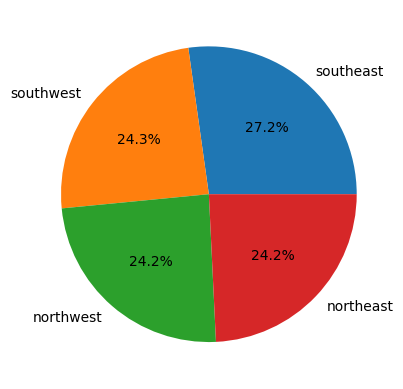

In [31]:
region = df['region'].value_counts()
plt.pie(region,labels=region.index,autopct='%1.1f%%')
plt.show()

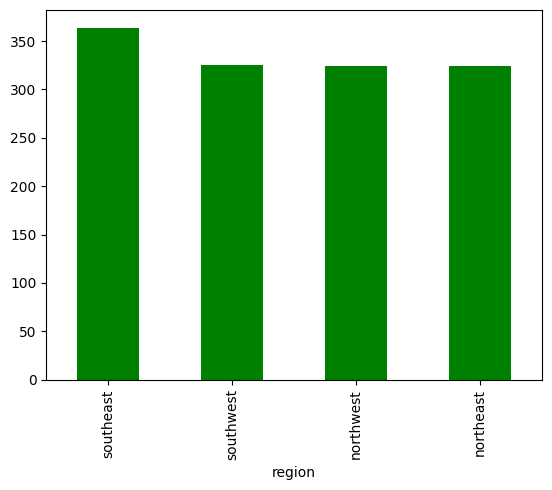

In [35]:
region.plot(kind='bar',color='g')
plt.show()

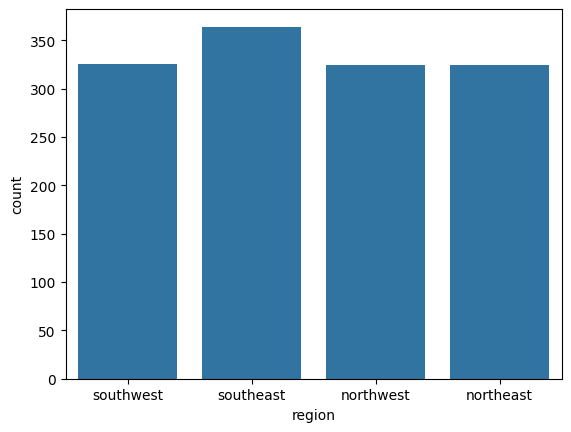

In [41]:
sns.countplot(x='region',data=df)
plt.show()

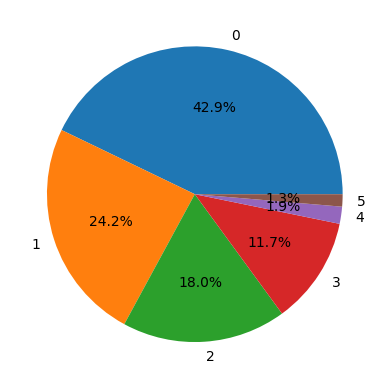

In [37]:
child = df['child'].value_counts()
plt.pie(child,labels=child.index,autopct='%1.1f%%')
plt.show()

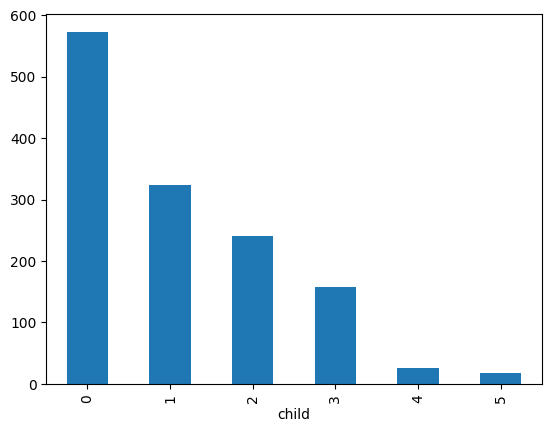

In [38]:
child.plot(kind='bar')
plt.show()

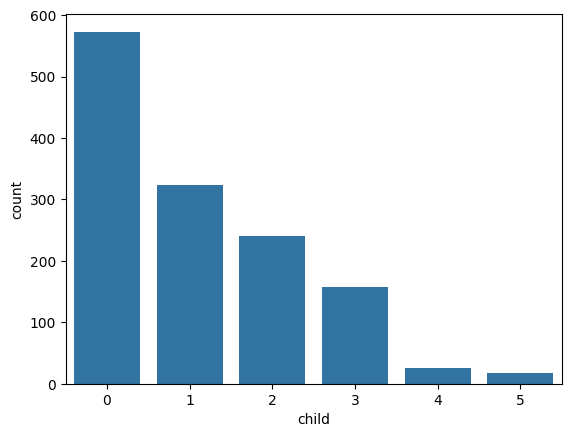

In [39]:
sns.countplot(x='child',data=df)
plt.show()

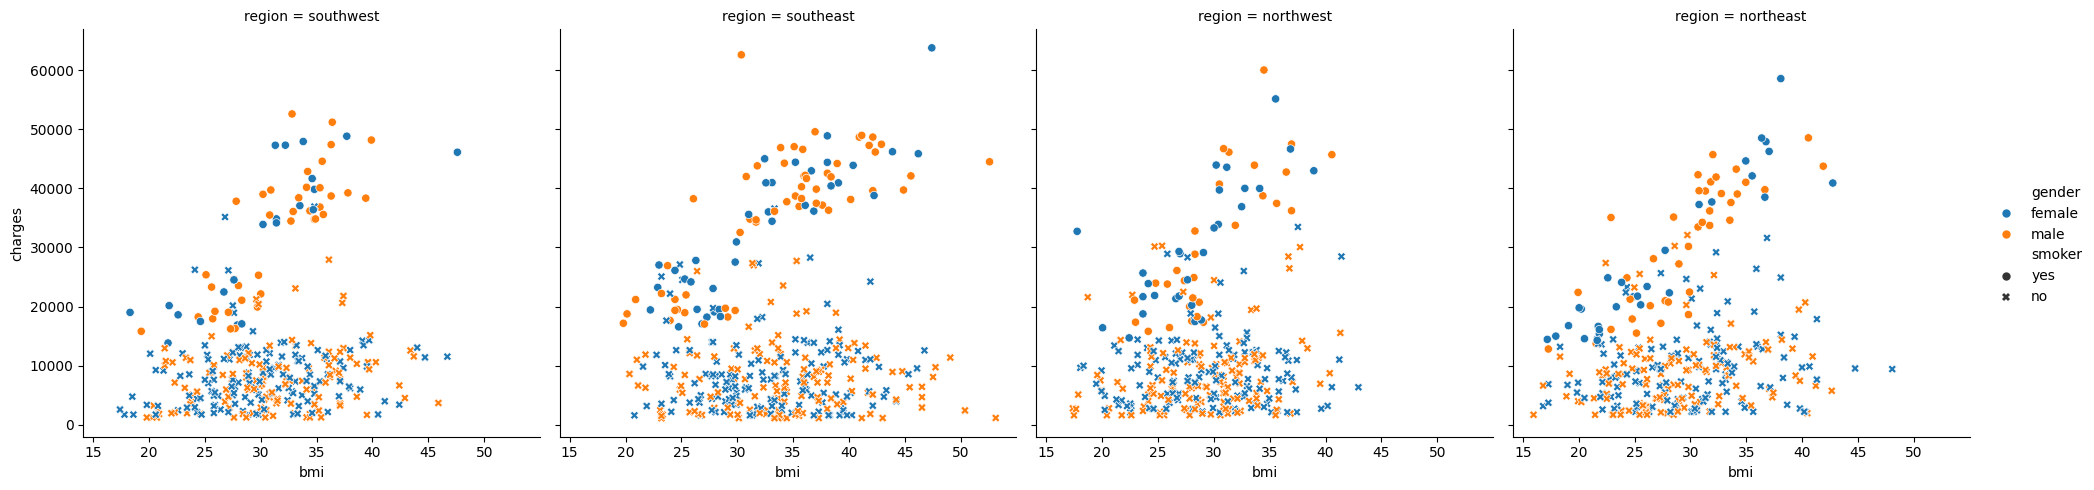

In [42]:
sns.relplot(x='bmi', y='charges',hue='gender',style='smoker', data=df,col='region')
plt.show()

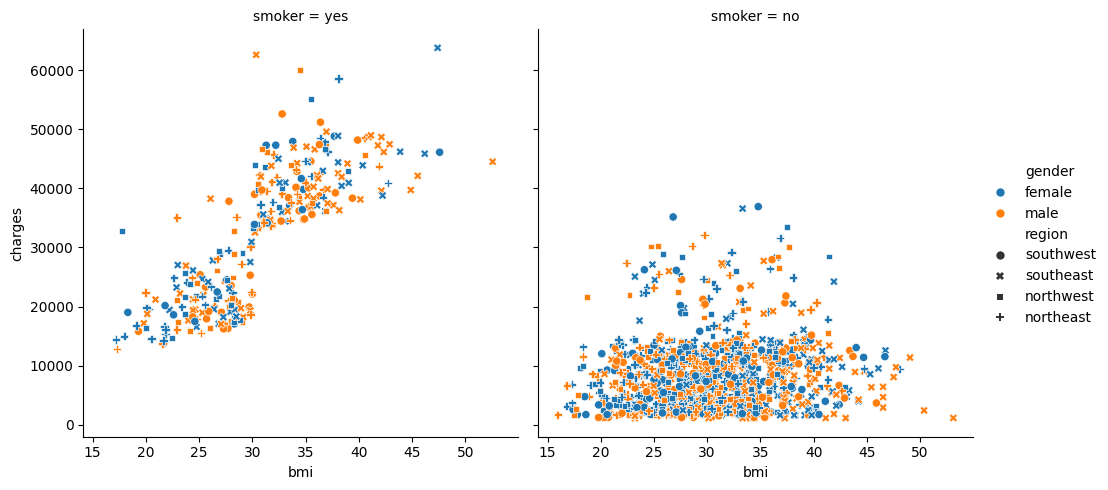

In [43]:
sns.relplot(x='bmi', y='charges',hue='gender',style='region', data=df,col='smoker')
plt.show()

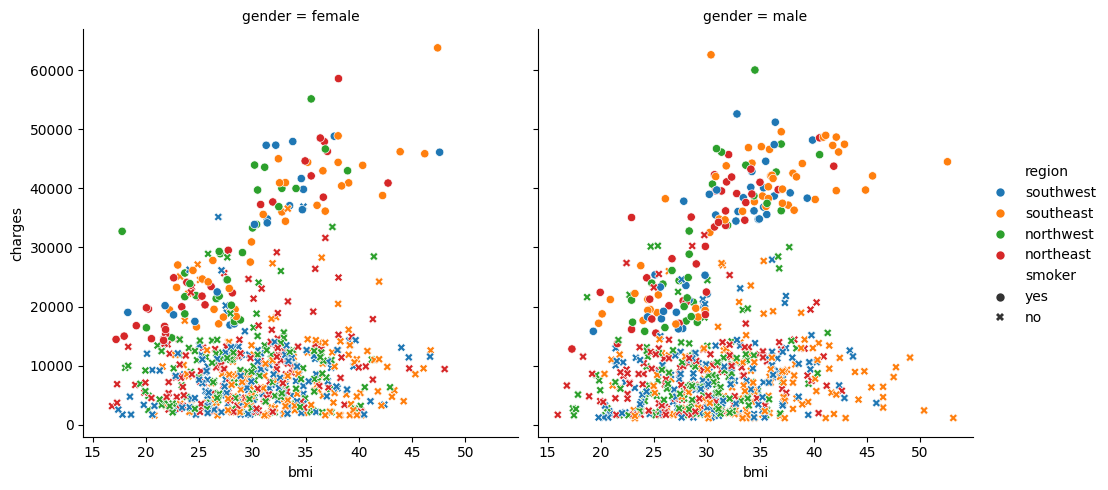

In [44]:
sns.relplot(x='bmi', y='charges',hue='region',style='smoker', data=df,col='gender')
plt.show()

In [45]:
min_children = df['child'].min()
max_children = df['child'].max()
mean_children = df['child'].mean()

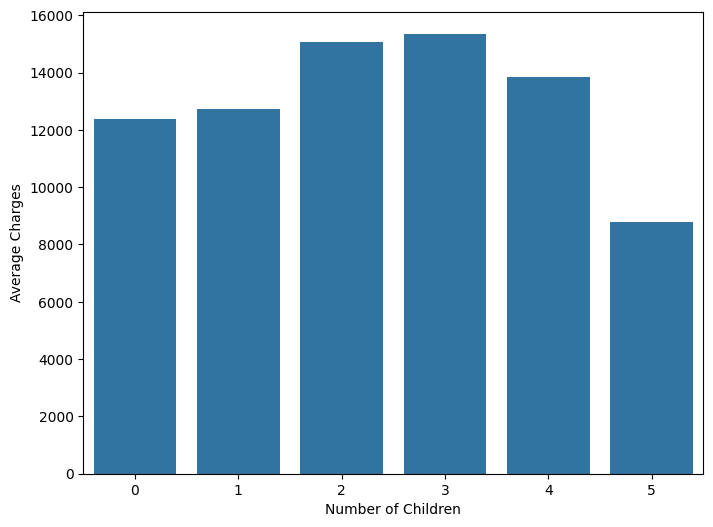

In [47]:
mean_charges = df.groupby('child')['charges'].mean().reset_index()
plt.figure(figsize =(8, 6))
sns.barplot(x='child',y='charges',data=mean_charges)
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

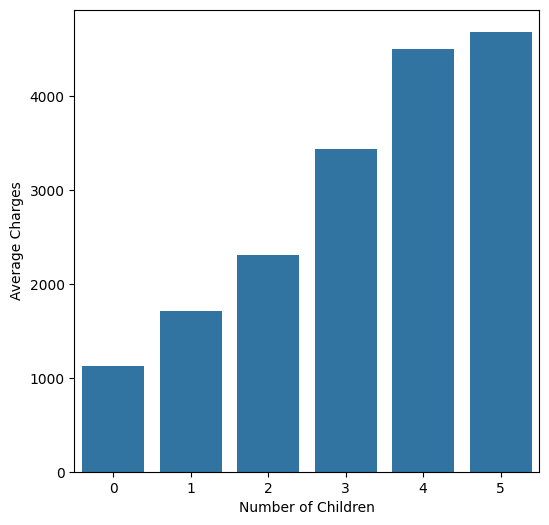

In [48]:
min_charges = df.groupby('child')['charges'].min().reset_index()
plt.figure(figsize=(6, 6))
sns.barplot(x='child', y='charges', data=min_charges)
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

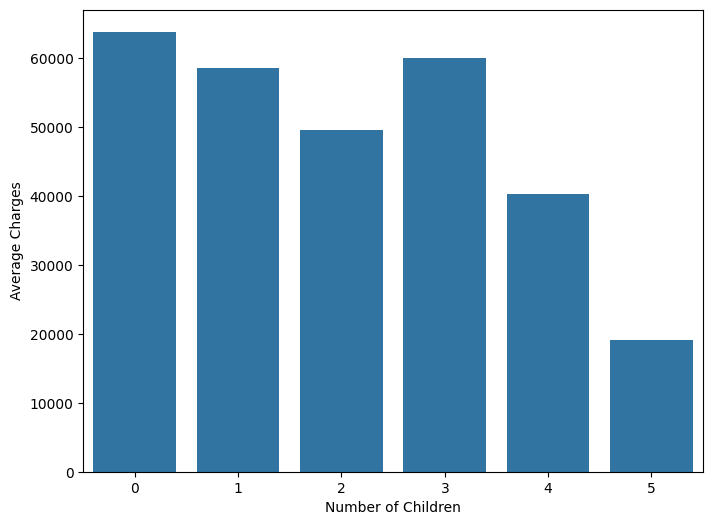

In [49]:
max_charges = df.groupby('child')['charges'].max().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='child', y='charges', data=max_charges)
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

# Data Transformation

In [51]:
df.select_dtypes(include='O')  # include only col with data type 'object;

,gender,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [52]:
df2 = pd.get_dummies(df,drop_first='if_binary').astype(int)
df2.head()

,age,bmi,child,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0




1. **`StandardScaler`**:
   - Used for **feature scaling** (standardization).
   - Scales features to have a mean of 0 and a standard deviation of 1.
   - Important for algorithms sensitive to feature scales (e.g., SVM, k-means).
   - Example usage: `scaler = StandardScaler(); scaled_data = scaler.fit_transform(X)`

2. **`LabelEncoder`**:
   - Converts categorical labels (strings or integers) into numeric labels.
   - Useful for encoding target variables (e.g., class labels) for classification tasks.
   - Example usage: `encoder = LabelEncoder(); encoded_labels = encoder.fit_transform(y)`

3. **`OneHotEncoder`**:
   - Converts categorical features into binary vectors (one-hot encoding).
   - Creates a new binary column for each category.
   - Useful for handling nominal categorical data.
   - Example usage: `encoder = OneHotEncoder(); encoded_features = encoder.fit_transform(X)`

4. **`OrdinalEncoder`**:
   - Similar to `LabelEncoder`, but specifically for ordinal categorical features.
   - Preserves the order of categories.
   - Example usage: `encoder = OrdinalEncoder(); encoded_features = encoder.fit_transform(X)`



In [53]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder

In [54]:
cat_col = df.select_dtypes(include='O')

In [55]:
# Change data into array
obj = OneHotEncoder()
obj.fit_transform(cat_col).toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

split data into independent and dependent variable

In [56]:
x = df2.drop('charges',axis=1)
y = df2[['charges']]

# Model Selection

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

Three commonly used regression models from the `sklearn` library:

1. **Linear Regression (`lnr`)**:
   - A simple linear model that assumes a linear relationship between input features and the target variable.
   - Suitable for continuous target variables.
   - Minimizes the sum of squared differences between predicted and actual values.
   - Example usage: `lnr.fit(X_train, y_train)`

2. **Decision Tree Regressor (`dtr`)**:
   - A non-linear model that partitions the feature space into regions based on decision rules.
   - Predicts the average target value within each region.
   - Prone to overfitting if not pruned.
   - Example usage: `dtr.fit(X_train, y_train)`

3. **Random Forest Regressor (`rdr`)**:
   - An ensemble model that combines multiple decision trees (bagging).
   - Reduces overfitting by averaging predictions from individual trees.
   - Hyperparameters like `min_samples_split` and `min_samples_leaf` control tree growth.
   - Example usage: `rdr.fit(X_train, y_train)`



In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
lnr = LinearRegression()
dtr = DecisionTreeRegressor()
rdr = RandomForestRegressor(min_samples_split=10,min_samples_leaf=3)

In [60]:
lnr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rdr.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=10)

# Model Training

In [61]:
print('LNR ,Training:',lnr.score(x_train,y_train)*100,' Testing:',lnr.score(x_test,y_test)*100)
print('DTR ,Training:',dtr.score(x_train,y_train)*100,' Testing:',dtr.score(x_test,y_test)*100)
print('RDR ,Training:',rdr.score(x_train,y_train)*100,' Testing:',rdr.score(x_test,y_test)*100)

LNR ,Training: 75.34869694739508  Testing: 72.01485211769348
DTR ,Training: 99.72442798366144  Testing: 65.94587159445251
RDR ,Training: 91.3891620611594  Testing: 84.95679381125177


In [62]:
import joblib
joblib.dump(lnr,'./models/linear_Regression.lb')
joblib.dump(lnr,'./models/Descision_Regression.lb')
joblib.dump(lnr,'./models/Random_Regression.lb')


['./models/Random_Regression.lb']

# Model Evaluation



1. **Support Vector Classifier (SVC)**:
   - A classification model that finds the optimal hyperplane to separate classes.
   - Works well for both linear and non-linear data.
   - Example usage: `svc = SVC(); svc.fit(X_train, y_train)`

2. **Support Vector Regressor (SVR)**:
   - A regression model that finds the optimal hyperplane to predict continuous target values.
   - Handles non-linear relationships using kernel functions.
   - Example usage: `svr = SVR(); svr.fit(X_train, y_train)`

3. **K-Nearest Neighbors Classifier (KNeighborsClassifier)**:
   - A simple classification model based on proximity to neighbors.
   - Assigns the majority class label of the k nearest neighbors.
   - Example usage: `knn_clf = KNeighborsClassifier(n_neighbors=3); knn_clf.fit(X_train, y_train)`

4. **K-Nearest Neighbors Regressor (KNeighborsRegressor)**:
   - A regression model that predicts target values based on the average of k nearest neighbors.
   - Useful for non-linear relationships.
   - Example usage: `knn_reg = KNeighborsRegressor(n_neighbors=5); knn_reg.fit(X_train, y_train)`



In [63]:
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [64]:
lnr_pred = lnr.predict(x_test)
dtr_pred = dtr.predict(x_test)
rdr_pred = rdr.predict(x_test)

In [65]:
x_test.columns

Index(['age', 'bmi', 'child', 'gender_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [68]:
# create a DataFrame that includes the actual target values and the predictions from different regression models.
compared_df = pd.concat([x_test,y_test],axis='columns')
compared_df['lnr_pred'] = lnr_pred
compared_df['dtr_pred'] = dtr_pred
compared_df['rdr_pred'] = rdr_pred

compared_df.head(10)

,age,bmi,child,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest,charges,lnr_pred,dtr_pred,rdr_pred
689,27,31,1,1,1,0,1,0,34806,28903.507349,36189.0,36629.223096
634,51,39,1,1,0,0,0,1,9391,13986.868413,9964.0,10027.812696
196,39,32,0,0,0,0,0,1,5649,8103.274807,5910.0,6198.577286
747,19,21,0,1,0,1,0,0,1627,-416.938346,1625.0,1617.937985
1235,26,31,0,1,0,1,0,0,2699,4920.753911,2523.0,3616.126948
390,48,35,4,1,0,0,0,0,10736,14389.896086,26392.0,13118.826029
147,51,37,1,0,0,0,1,0,9877,13542.744179,9048.0,9594.488095
553,52,31,2,0,0,1,0,0,11187,12798.499168,29186.0,16265.005255
1006,28,29,2,1,0,0,0,0,4438,6121.316352,20277.0,7126.821829
153,42,23,0,0,1,0,0,0,19964,30659.746855,19798.0,21720.957396


# Model Deployment

In [69]:
import os
os.makedirs('prediction',exist_ok=True)

In [70]:
compared_df.to_csv('./prediction/prediction.csv', index=False)